# Usando o algoritmo árvore de decisão para classificar tipos de tumores mamários

Tumor é o nome dado ao crescimento rápido e imprevisto de células humanas e podem ser *benignos* ou *malignos*. Tumores malignos ocorrem quando esse processo de crescimento celular danifica outras células do corpo humano a ponto de se espalhar para outras partes do corpo (*metástase*).

Segundo o DATASUS "As neoplasias constituem a terceira causa de morte no Brasil, representando, em 1998, 14% dos óbitos informados. As estimativas para o ano 2001 indicam a ocorrência de aproximadamente 305 mil casos e 117 mil óbitos por tumores malignos".

O que mais atrapalha o tratamento e a cura dessa doença é o diagnóstico tardio, pois além de muitos sintomas não serem percebido logo que a doença surge, certos exames que podem diagnosticar esse problema podem não ser rápidos em identificar o tipo do tumor. Tendo em vista isso temos, então, um problema de classificação. Precisaremos identificar se o tumor é benigno ou maligno.

## Sobre os dados

Os dados são de tumores de câncer de mama e as *features* calculadas a partir de uma imagem digitalizada de um aspirado por agulha fina (PAAF) de uma massa mamária. Eles descrevem características dos núcleos celulares presentes na imagem.
O dataset em questão foi obtido na plataforma Kaggle [aqui](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) e possui as seguintes variáveis:

**1)** Número de identificação

**2)** Diagnóstico (**M = maligno, B = benigno**)

**3)** raio (média das distâncias do centro aos pontos do perímetro)

**4)** textura (desvio padrão dos valores da escala de cinza)

**5)** perímetro

**6)** área

**7)** lisura (variação local nos comprimentos do raio)

**8)** compacidade (perímetro ^ 2 / área - 1,0)

**9)** concavidade (gravidade das partes côncavas do contorno)

**10)** pontos côncavos (número de partes côncavas do contorno)

**11)** simetria

**12)** dimensão fractal

Para cada features serão usadas a suas médias (mean), desvios-padrões (se) e "pior" ou maior (worst) para classificação.

## Objetivo do projeto

O objetivo desse projeto é usar o Algoritmo de Árvore de Decisão e identificar, a partir das características de tumores mamários, se um tumor é do tipo Maligno (M) ou do tipo Benigno (B).

## Importando bibliotecas e módulos

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pydot
import graphviz
plt.style.use('ggplot')

from ipywidgets import interactive
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

## Importação dos dados

In [5]:
diagnostico=pd.read_csv('cancer.csv')

## Análise preliminar dos dados

Abaixo vemos as primeiras linhas da nossa base de dados.

In [6]:
diagnostico.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


E as últimas  linhas.

In [7]:
diagnostico.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


Nossa base de dados é uma base com 569 linhas e 33 colunas.

In [9]:
diagnostico.shape

(569, 33)

Como pode-se observar a maioria das colunas do conjunto de dados é do tipo *float*.

In [10]:
diagnostico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Não há valores faltantes na base de dados.

In [11]:
diagnostico.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

tabela contendo as estatísticas descritivas de cada coluna do *dataset*.

In [12]:
diagnostico.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Análise exploratória dos dados

Podemos ver abaixo que a variável *target diagnosis* está desequilibrada ou desbalanceada, pois existem mais dagnósticos de tumores benignos do que câncer (tumores malignos).

Pode ser o caso de aplicar um método de *oversampling* ou *undersampling* para rebalancearmos essas classes.

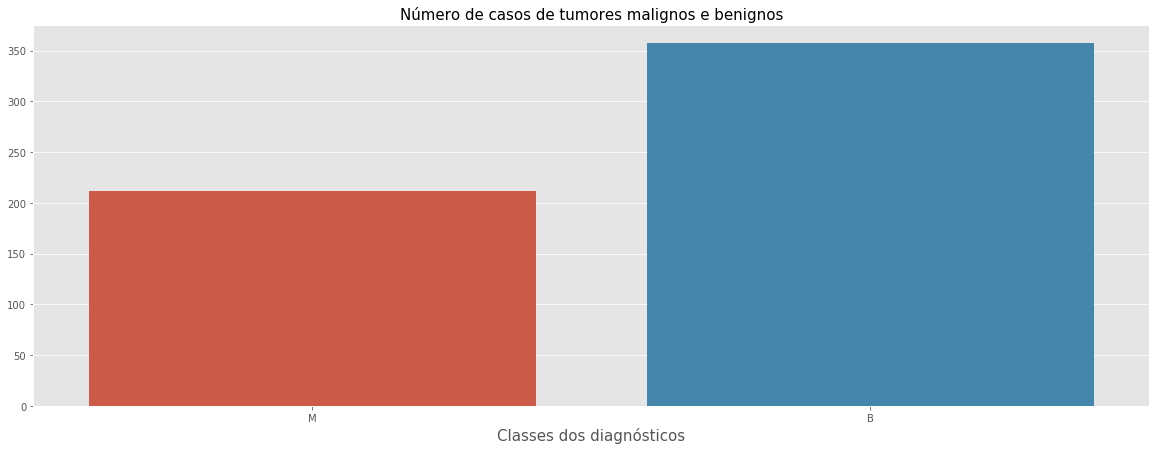

In [41]:
plt.figure(figsize=(20,7))
sns.countplot(x="diagnosis", data=diagnostico)
plt.xlabel('Classes dos diagnósticos',size=15)
plt.ylabel('')
plt.title('Número de casos de tumores malignos e benignos',size=15);

Distribuição das colunas das *features* que são as médias.

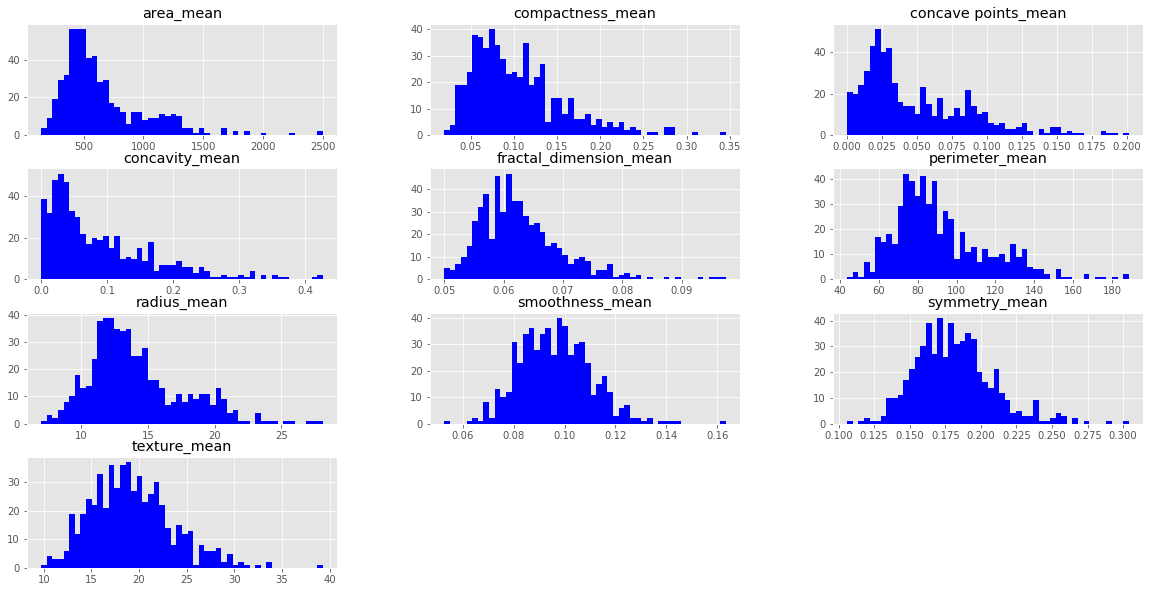

In [33]:
diagnostico[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
             'compactness_mean','concavity_mean','concave points_mean','symmetry_mean',
             'fractal_dimension_mean']].hist(figsize=(20,10),color = "blue",bins=50);

Distribuição das colunas das features que são de desvio-padrão.

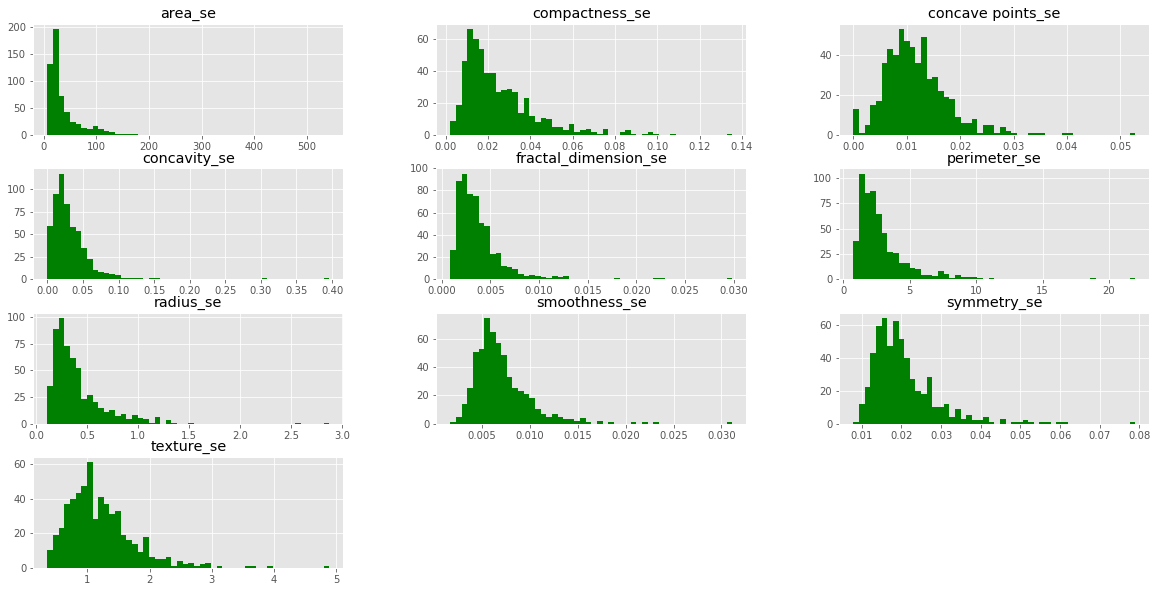

In [31]:
diagnostico[['radius_se','texture_se','perimeter_se','area_se','smoothness_se',
             'compactness_se','concavity_se','concave points_se',
             'symmetry_se','fractal_dimension_se']].hist(figsize=(20,10),color = "green",bins=50);

**DISTRIBUIÇÕES DAS COLUNAS DAS FEATURES (WORST)**

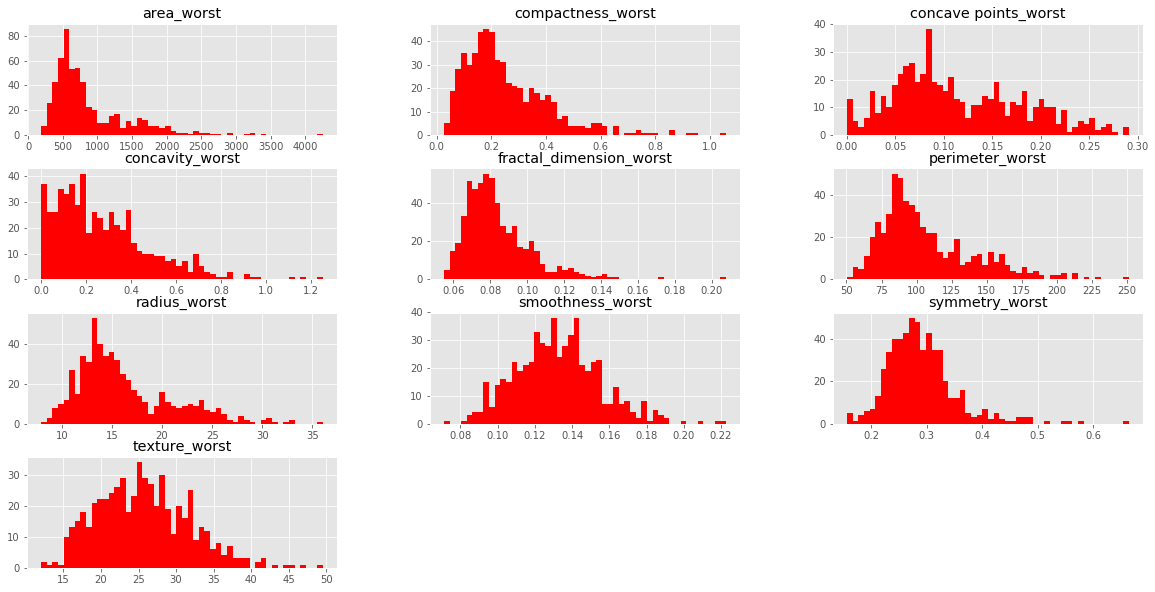

In [32]:
diagnostico[['radius_worst','texture_worst','perimeter_worst',
                            'area_worst','smoothness_worst','compactness_worst',
                            'concavity_worst','concave points_worst','symmetry_worst',
                            'fractal_dimension_worst']].hist(figsize=(20,10),color = "red",bins=50);

Correlação entre as *features*.

**MEAN (MÉDIA)**

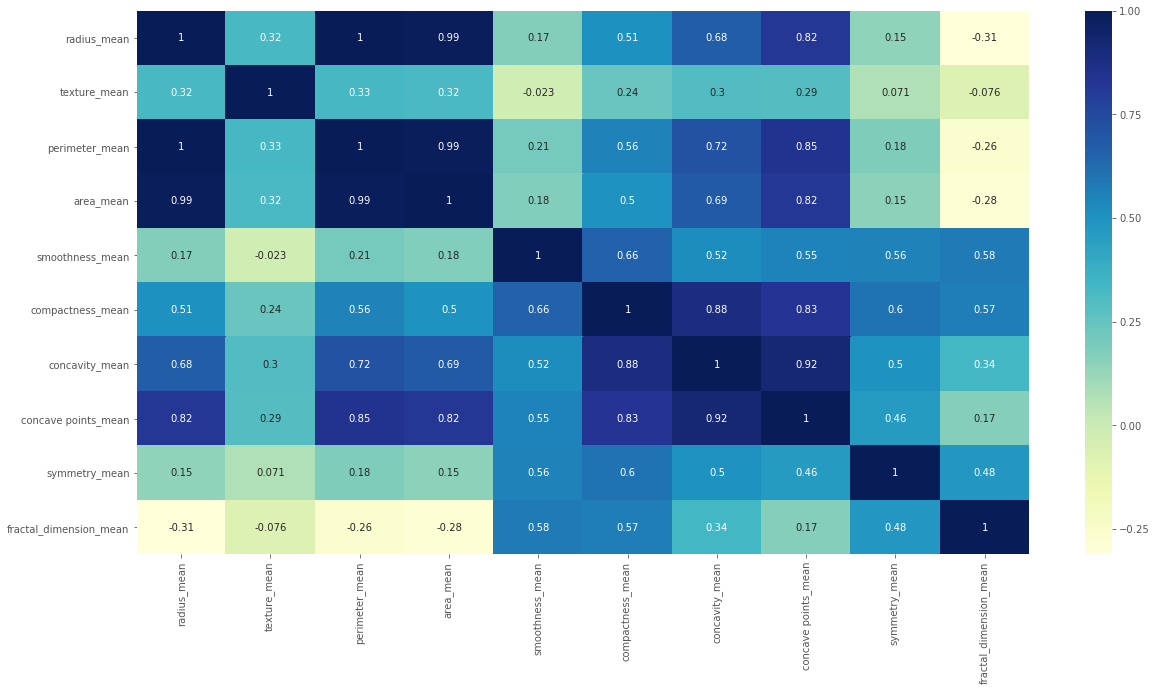

In [25]:
correlacoes=diagnostico[['radius_mean','texture_mean','perimeter_mean',
                         'area_mean','smoothness_mean','compactness_mean',
                         'concavity_mean','concave points_mean','symmetry_mean',
                         'fractal_dimension_mean']].corr()
%matplotlib inline
plt.figure(figsize=(20,10))
sns.heatmap(correlacoes, annot = True, cmap = "YlGnBu");

**STANDARD ERROR (ERRO PADRÃO)**

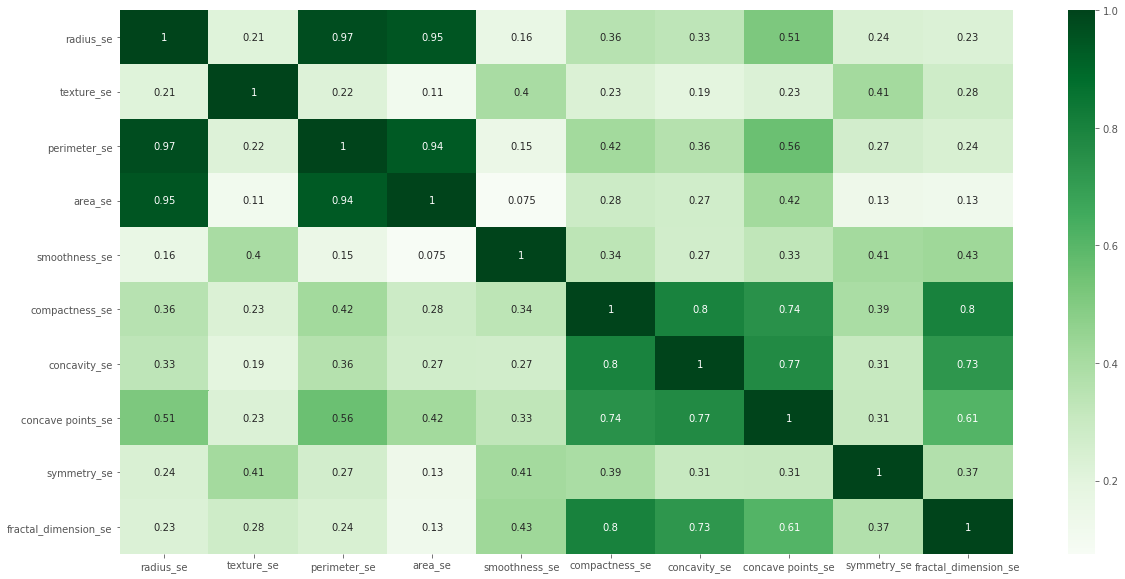

In [28]:
correlacoes2 = diagnostico[['radius_se','texture_se',
                            'perimeter_se','area_se','smoothness_se',
                            'compactness_se','concavity_se','concave points_se',
                            'symmetry_se','fractal_dimension_se']].corr()
%matplotlib inline
plt.figure(figsize=(20,10))
sns.heatmap(correlacoes2, annot = True, cmap = "Greens");

**WORST**

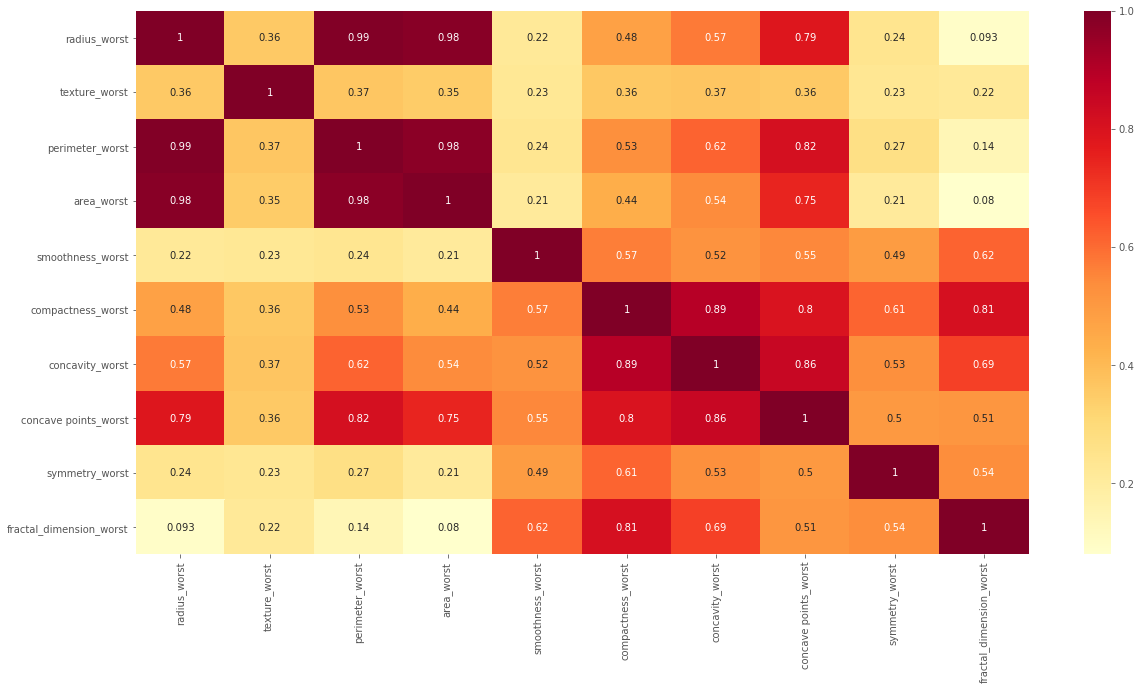

In [29]:
correlacoes3 = diagnostico[['radius_worst','texture_worst','perimeter_worst',
                            'area_worst','smoothness_worst','compactness_worst',
                            'concavity_worst','concave points_worst','symmetry_worst',
                            'fractal_dimension_worst']].corr()
%matplotlib inline
plt.figure(figsize=(20,10))
sns.heatmap(correlacoes3, annot = True, cmap ="YlOrRd");

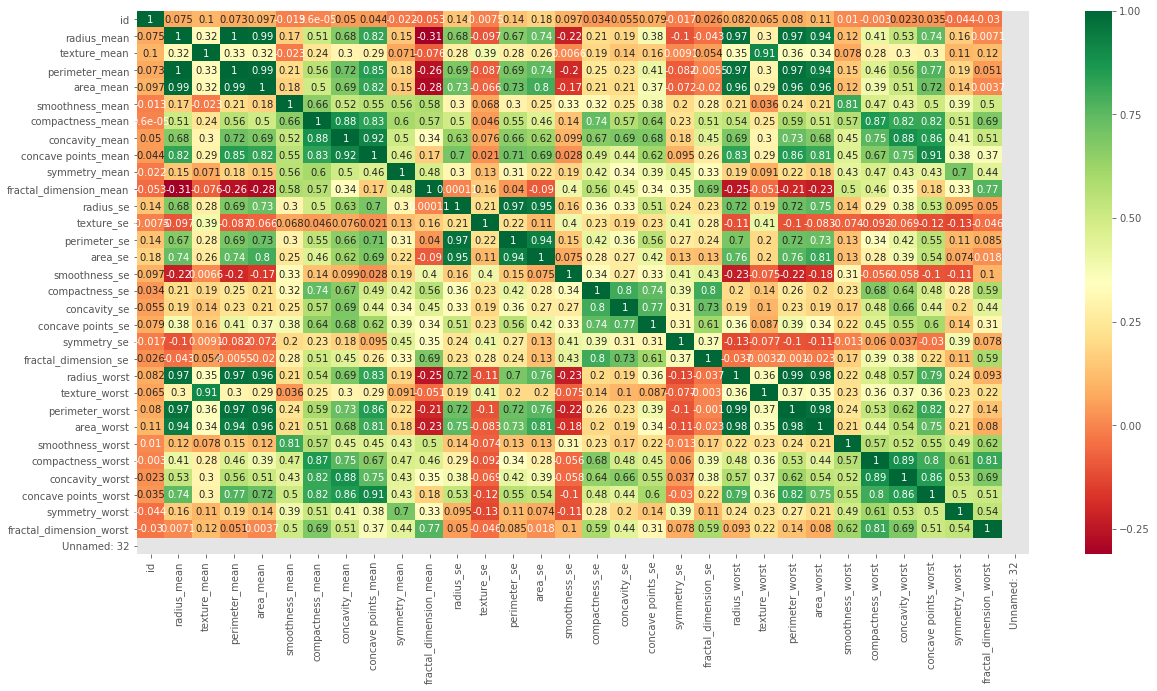

In [42]:
correlacoes4=diagnostico.corr()
%matplotlib inline
plt.figure(figsize=(20,10))
sns.heatmap(correlacoes4, annot = True, cmap = "RdYlGn");

## Excluindo colunas

Essa duas colunas *Unnamed:32* e *id* não são relebantes para o processo de classificação.

In [43]:
diagnostico.drop(['Unnamed: 32'], axis=1,inplace=True)
diagnostico.drop(['id'], axis=1,inplace=True)

## Separando os dados de treino e teste

Vamos primeiro definir quais as variáveis características (*features*) e qual a variável alvo (*target*).

In [44]:
X=diagnostico.drop(['diagnosis'],axis=1)
y=diagnostico['diagnosis']

E aqui vamos separar os dados de treino e de teste com o módulo *train_test_split*.

In [46]:
X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,random_state=42)

## Aplicação do modelo de *Árvore de decisão*

Agoar iremos aplicar os dados de treino (*x_treino* e *y_treino*) ao nosso modelo de *árvore de decisão* e vamos gerar as previsões desse modelo com a base *x_teste*.

In [51]:
arvore=tree.DecisionTreeClassifier().fit(X_treino,y_treino)

DecisionTreeClassifier()

Gerando as previsões do modelo.

In [52]:
resultado=arvore.predict(X_teste)

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype=object)

#### Matriz de confusão do modelo *Decision Tree*

Vamos agora usar a matriz de confusão para visualizar o quanto o modelo confundiu de uma classe para outra.

Para a classe **'B'** o modelo acertou 84 observações de 89 e *confundiu* 5 observações com a classe **'M'**.

Para a classe **'M'** o modelo acertou 52 observações de 54 e *confundiu* 2 observações com a classe **'B'**.

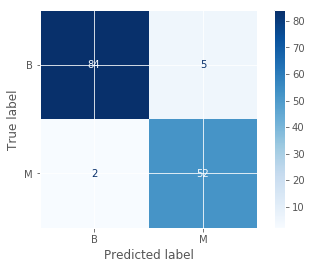

In [105]:
disp=plot_confusion_matrix(arvore,X_teste,y_teste,cmap='Blues',values_format='.5g')

#### Aplicando *Cross validation* para gerar a acurácia do modelo de *Árvore de decisão*

Vemos obtemos uma acurácia considerada muito boa.

In [56]:
resultados = cross_val_predict(arvore,X,y,cv=10)
print(metrics.accuracy_score(y,resultados)*100)

92.2671353251318


#### Métricas de avaliação do modelo *Árvore de decisão*

Vemos que para a classe *B* que trata de tumores benignos, obtivemos uma precisão de 98%, um *recall* de 94% e um *f1-score* de 96%. Para a classe *M*, que trata de tumores malignos, a precisão foi menor (91%), mas o *recall* foi maior e o *f1-score* foi um pouco menor que o da classe *B*.

Isso provavelmente ocorreu por conta do desbalanceamento das classes, entretando o resultado foi bastante positivo.

In [57]:
print(metrics.classification_report(y_teste,resultado))

              precision    recall  f1-score   support

           B       0.98      0.94      0.96        89
           M       0.91      0.96      0.94        54

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



Um método bastante útil é o *feature importances* que existe nos modelos do tipo árvore. Com ele podemos ver quais as *features* consideradas mais importantes para o nosso modelo de *árvore de decisão*. O valor dessas *importâncias* está entre 0 e 1 e somados essas valores o resultado será 1.

Abaixo podemos os valores das *importâncias*, mas não conseguimos identificar quais as colunas.

In [58]:
arvore.feature_importances_

array([0.        , 0.02601101, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.69593688, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01277192, 0.00155458,
       0.00670697, 0.        , 0.01702539, 0.        , 0.        ,
       0.06737645, 0.09949554, 0.02874416, 0.03452044, 0.00985664,
       0.        , 0.        , 0.        , 0.        , 0.        ])

Abaixo podemos identificar cada um dos valores das importâncias das *features*.

In [59]:
feature_imp=pd.Series(arvore.feature_importances_,index=X_treino.columns)
feature_imp

radius_mean                0.000000
texture_mean               0.026011
perimeter_mean             0.000000
area_mean                  0.000000
smoothness_mean            0.000000
compactness_mean           0.000000
concavity_mean             0.000000
concave points_mean        0.695937
symmetry_mean              0.000000
fractal_dimension_mean     0.000000
radius_se                  0.000000
texture_se                 0.000000
perimeter_se               0.000000
area_se                    0.012772
smoothness_se              0.001555
compactness_se             0.006707
concavity_se               0.000000
concave points_se          0.017025
symmetry_se                0.000000
fractal_dimension_se       0.000000
radius_worst               0.067376
texture_worst              0.099496
perimeter_worst            0.028744
area_worst                 0.034520
smoothness_worst           0.009857
compactness_worst          0.000000
concavity_worst            0.000000
concave points_worst       0

Podemos ver no gráfico abaixo que as features mais importantes para o modelo de árvore de decisão foram:

|          Feature     || Nível de importância no modelo 1              ||
|----------------------||:----------------------------------------------||
|texture_mean          ||              0.026011                         ||
|concave points_mean   ||              0.724681                         ||
|symmetry_mean         ||              0.006707                         ||
|radius_se             ||              0.012772                         ||
|smoothness_se         ||              0.001555                         ||
|concave points_se     ||              0.017025                         ||
|fractal_dimension_se  ||              0.008384                         ||
|radius_worst          ||              0.058993                         ||
|texture_worst         ||              0.099496                         ||
|area_worst            ||              0.034520                         ||
|smoothness_worst      ||              0.009857                         || 

A de maior valores foi a *concave points_mean* com valor de 72% e em seguida, *texture_worst* com 9.9%, *radius_worst* com 5.8% e, por fim, *area_worst* com 3.4%.

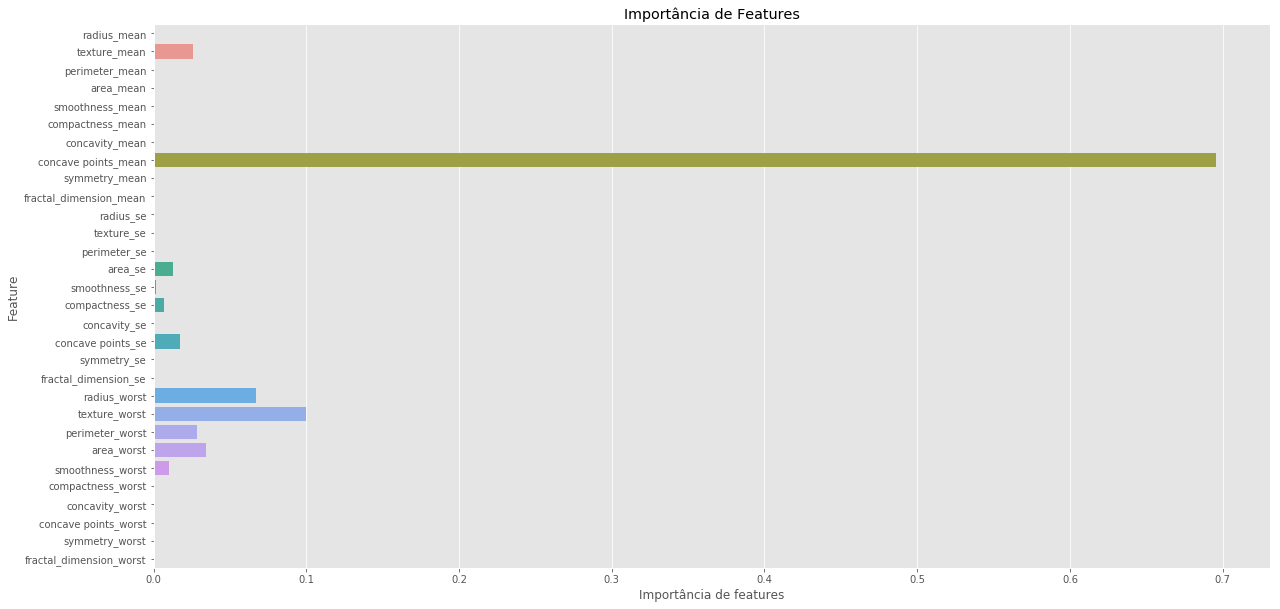

In [60]:
%matplotlib inline
plt.figure(figsize=(20,10))
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Importância de features')
plt.ylabel('Feature')
plt.title('Importância de Features')
plt.show()

## Conhecendo a *Árvore de Decisão*

Podemos também plotar a *árvore de decisão* para saber como ela separou os dados.

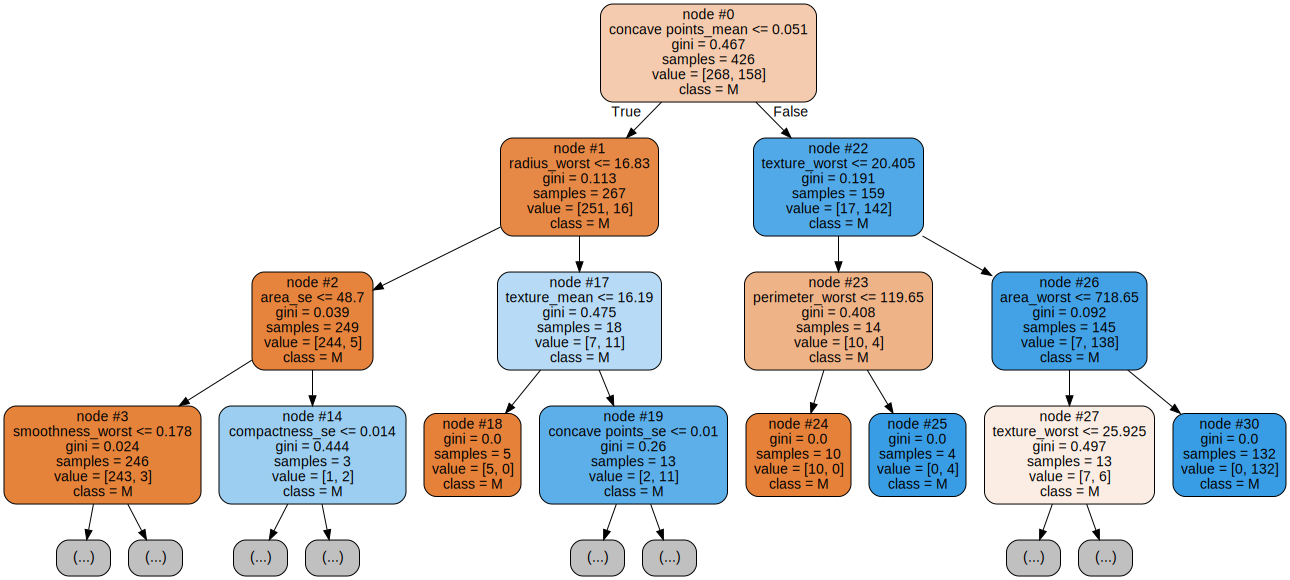

In [62]:
dot_data = tree.export_graphviz(arvore, feature_names=X.columns, class_names=y,max_depth=3, filled=True, rounded=True,
                                node_ids=True,label='all',)  
graph = graphviz.Source(dot_data)  
graph

Renderizar uma árvore de decisão é gerar uma forma interativa de manipular a árvore alterando os seus parâmetros. Logo a seguir iremos criar um caixa de interação e poderemos ter mais liberdade para manipular nossa árvore de decisão.

In [66]:
features_label = diagnostico.columns[1:]
class_label = diagnostico.columns[0]

Aqui criaremos uma função que será alimentada pelos parâmetros e será usada para gerar o *display*.

In [67]:
def plot_tree(crit,split,depth,min_split,min_leaf=0.2):
    estimator=tree.DecisionTreeClassifier(random_state=42, criterion=crit, splitter=split, max_depth=depth, 
                                          min_samples_split=min_split, min_samples_leaf=min_leaf)
    estimator.fit(X,y)
    graph=Source(tree.export_graphviz(estimator, out_file=None, feature_names=features_label, class_names=class_label,
                                      filled=True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

Gerando o display interativo.

In [68]:
inter=interactive(plot_tree, crit=["gini","entropy"], split=["best","random"], depth=[1,2,3,4,5], min_split=(0.1,1), 
                  min_leaf=(0.1,0.5))
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

#### Navegando na *Árvore de Decisão*

Separando os dados para treino e teste novamente.

In [69]:
X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,random_state=42)

Treinando novamente o modelo de *árvore de decisão*.

In [70]:
estimator=tree.DecisionTreeClassifier(max_leaf_nodes=3,random_state=42)
estimator.fit(X_treino,y_treino)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=42)

Vamos agora contar os nós da *árvore de decisão* que estão a esquerda e a direita da árvore.

In [71]:
n_nodes=estimator.tree_.node_count #contagem de nós
children_left=estimator.tree_.children_left #índices a esquerda
children_right=estimator.tree_.children_right #índices a direita
feature=estimator.tree_.feature
threshold=estimator.tree_.threshold

In [72]:
print("Números de nós: {}".format(n_nodes))
print("Índices a esquerda : {}".format(children_left))
print("Índices a direita : {}".format(children_right))
print("Feature : {}".format(feature))
print("Limite/Threshold : {}".format(threshold))

Números de nós: 5
Índices a esquerda : [ 1  3 -1 -1 -1]
Índices a direita : [ 2  4 -1 -1 -1]
Feature : [ 7 20 -2 -2 -2]
Limite/Threshold : [ 0.05128    16.82999992 -2.         -2.         -2.        ]


Agora podemos descrever como é a estrutura da *árvore de decisão*.

In [73]:
node_depth=np.zeros(shape=n_nodes,dtype=np.int64)
is_leaves=np.zeros(shape=n_nodes, dtype=bool)
stack=[(0,-1)]

while len(stack)>0:
    node_id, parent_depth=stack.pop()
    node_depth[node_id]=parent_depth+1
    if(children_left[node_id]!=children_right[node_id]):
        stack.append((children_left[node_id],parent_depth+1))
        stack.append((children_right[node_id],parent_depth+1))
        
print("\n A árvore binária tem %s nós e a seguinte estrutura : \n"
      % n_nodes)

for i in range(n_nodes):
    if is_leaves[i]:
        print("%s nó = %s (nó folha)." %(node_depth[i]* "\t",i))
    else:
        print("%s nós = %s (nó teste): vai para o nó %s se o valor atributo %s <= %s \n se não, vai para o nó %s"\
              %(node_depth[i]*"\t",
                i,
                children_left[i],
                features_label[feature[i]],
                threshold[i],
                children_right[i])) 


 A árvore binária tem 5 nós e a seguinte estrutura : 

 nós = 0 (nó teste): vai para o nó 1 se o valor atributo concave points_mean <= 0.05127999931573868 
 se não, vai para o nó 2
	 nós = 1 (nó teste): vai para o nó 3 se o valor atributo radius_worst <= 16.829999923706055 
 se não, vai para o nó 4
	 nós = 2 (nó teste): vai para o nó -1 se o valor atributo symmetry_worst <= -2.0 
 se não, vai para o nó -1
		 nós = 3 (nó teste): vai para o nó -1 se o valor atributo symmetry_worst <= -2.0 
 se não, vai para o nó -1
		 nós = 4 (nó teste): vai para o nó -1 se o valor atributo symmetry_worst <= -2.0 
 se não, vai para o nó -1


## Remodelagem


Podemos também refazer o modelo de árvore de decisão e usarmos apenas as *features* mais importantes dessa vez. Vamos atribuir à uma variável um *dataset* com apenas as *features* consideradas importantes para o modelo de *árvore de decisão* e vamos ver se o desempenho da árvore melhora ou piora.

Aqui selecionamos as *features* que tiveram valor diferente de zero no *feature importance* do modelo de árvore anterior. De 30 *fetaures* (pois estamos descartando a variável *diagnosis*, *Unnamed:32* e *id*)  temos, agora, 11 *features*. Um redução considerável da nossa base de dados.

In [75]:
diagnostico1 = diagnostico[['diagnosis','texture_mean','concave points_mean','symmetry_mean',
                            'radius_se', 'smoothness_se', 'concave points_se', 'fractal_dimension_se',
                            'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst']]

Vamos visualizar as 5 primeiras linhas desse novo *dataset*.

In [76]:
diagnostico1.head()

,diagnosis,texture_mean,concave points_mean,symmetry_mean,radius_se,smoothness_se,concave points_se,fractal_dimension_se,radius_worst,texture_worst,area_worst,smoothness_worst
0,M,10.38,0.14710,0.2419,1.0950,0.006399,0.01587,0.006193,25.38,17.33,2019.0,0.1622
1,M,17.77,0.07017,0.1812,0.5435,0.005225,0.01340,0.003532,24.99,23.41,1956.0,0.1238
2,M,21.25,0.12790,0.2069,0.7456,0.006150,0.02058,0.004571,23.57,25.53,1709.0,0.1444
3,M,20.38,0.10520,0.2597,0.4956,0.009110,0.01867,0.009208,14.91,26.50,567.7,0.2098
4,M,14.34,0.10430,0.1809,0.7572,0.011490,0.01885,0.005115,22.54,16.67,1575.0,0.1374


E as 5 últimas linhas.

In [98]:
diagnostico1.tail()

,diagnosis,texture_mean,concave points_mean,symmetry_mean,radius_se,smoothness_se,concave points_se,fractal_dimension_se,radius_worst,texture_worst,area_worst,smoothness_worst
564,M,22.39,0.13890,0.1726,1.1760,0.010300,0.02454,0.004239,25.450,26.40,2027.0,0.14100
565,M,28.25,0.09791,0.1752,0.7655,0.005769,0.01678,0.002498,23.690,38.25,1731.0,0.11660
566,M,28.08,0.05302,0.1590,0.4564,0.005903,0.01557,0.003892,18.980,34.12,1124.0,0.11390
567,M,29.33,0.15200,0.2397,0.7260,0.006522,0.01664,0.006185,25.740,39.42,1821.0,0.16500
568,B,24.54,0.00000,0.1587,0.3857,0.007189,0.00000,0.002783,9.456,30.37,268.6,0.08996


Gráfico de correlação do novo *dataset*.

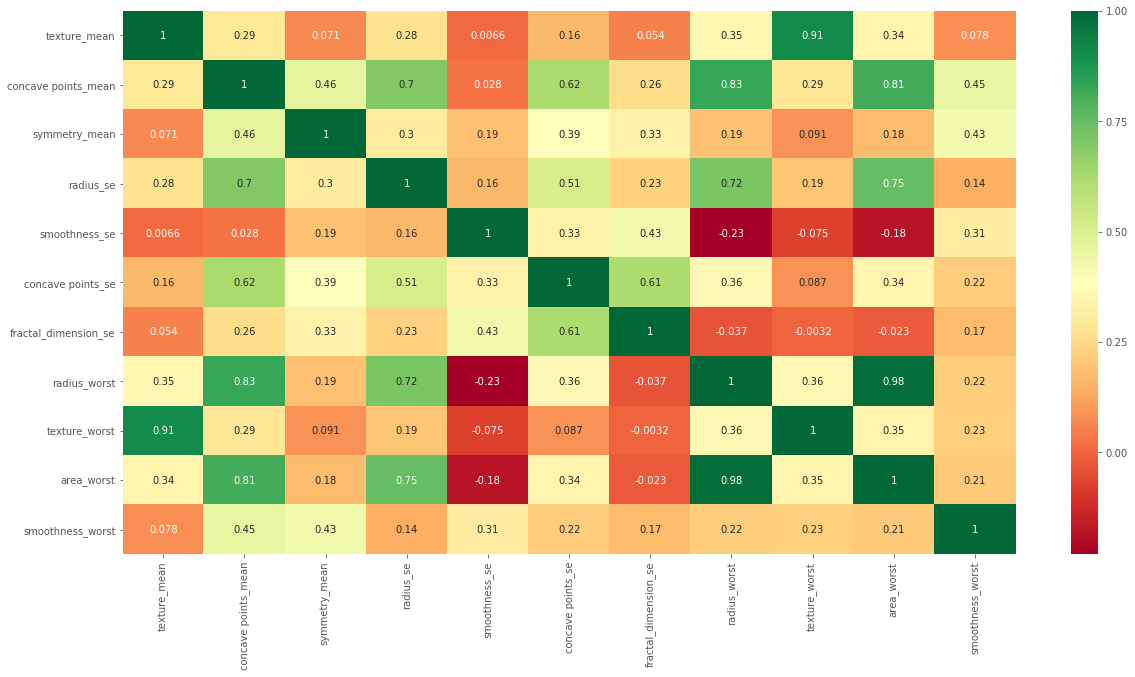

In [100]:
%matplotlib inline
plt.figure(figsize=(20,10))
sns.heatmap(diagnostico1.corr(), annot = True, cmap= "RdYlGn");

## Treino e teste

Vamos separar novamente os dados de treino e teste para treinarmos a *árvore de decisão*.

In [113]:
y2=diagnostico1['diagnosis']
X2=diagnostico1.drop(['diagnosis'],axis=1)
X2_treino,X2_teste,y2_treino,y2_teste = train_test_split(X2,y2,random_state=42)

## Retreino do modelo de árvore

In [114]:
arvore2=tree.DecisionTreeClassifier()
arvore2.fit(X2_treino,y2_treino)

DecisionTreeClassifier()

Gerando novamente as previsões.

In [115]:
resultado2=arvore2.predict(X2_teste)
resultado2

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype=object)

#### Matriz de confusão

Para a classe **'B'** o modelo acertou 83 observações de 89 e confundiu 6 observações com a classe **'M'**.

Para a classe **'M'** o modelo acertou 51 observações de 54 e confundiu 3 observações com a classe **'B'**.

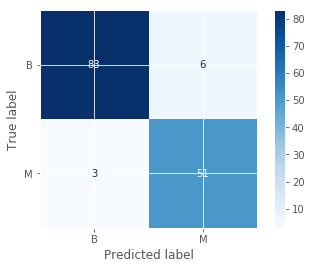

In [116]:
disp=plot_confusion_matrix(arvore2,X2_teste,y2_teste,cmap='Blues',values_format='.5g')

#### Acurácia do modelo

Como podemos observar, houve uma melhora na acurácia do modelo em relação ao anterior, que subiu de 91.03% para 93.84%.

In [90]:
resultados2 = cross_val_predict(arvore2,X2,y2,cv=10)
print(metrics.accuracy_score(y2,resultados2)*100)

93.84885764499121


#### Métricas de avaliação

Aqui nas métricas de avaliação tivemos um pequena queda na precisão da classificação de tumores benignos (de 98% para 97%), mas um leve melhora na precisão de classificação de tumores malignos (91% para 93%). O *recall* da classe *'B'* teve uma melhora e o da classe *'M'* um piora, mas o *f1-score* de cada classe não se alterou.

Podemos ver que a seleção de *features* pelo método *feature importance* trouxe um melhora no modelo.

In [91]:
print(metrics.classification_report(y2_teste,resultado2))

              precision    recall  f1-score   support

           B       0.97      0.96      0.96        89
           M       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



Vamos observar quais as *features* mais importantes desse modelo, novamente.

In [92]:
arvore2.feature_importances_

array([0.03439473, 0.70264385, 0.        , 0.01277192, 0.00155458,
       0.01702539, 0.        , 0.05899273, 0.09949554, 0.06326461,
       0.00985664])

In [94]:
feature_imp=pd.Series(arvore2.feature_importances_,index=X2_treino.columns)
feature_imp

texture_mean            0.034395
concave points_mean     0.702644
symmetry_mean           0.000000
radius_se               0.012772
smoothness_se           0.001555
concave points_se       0.017025
fractal_dimension_se    0.000000
radius_worst            0.058993
texture_worst           0.099496
area_worst              0.063265
smoothness_worst        0.009857
dtype: float64

A *feature* *concave points_mean* teve uma pequena queda em sua importância, enquanto *area_worst* teve um aumento. E das 11 *features*, duas deixaram de ter importância nesse novo modelo de árvore de decisão.

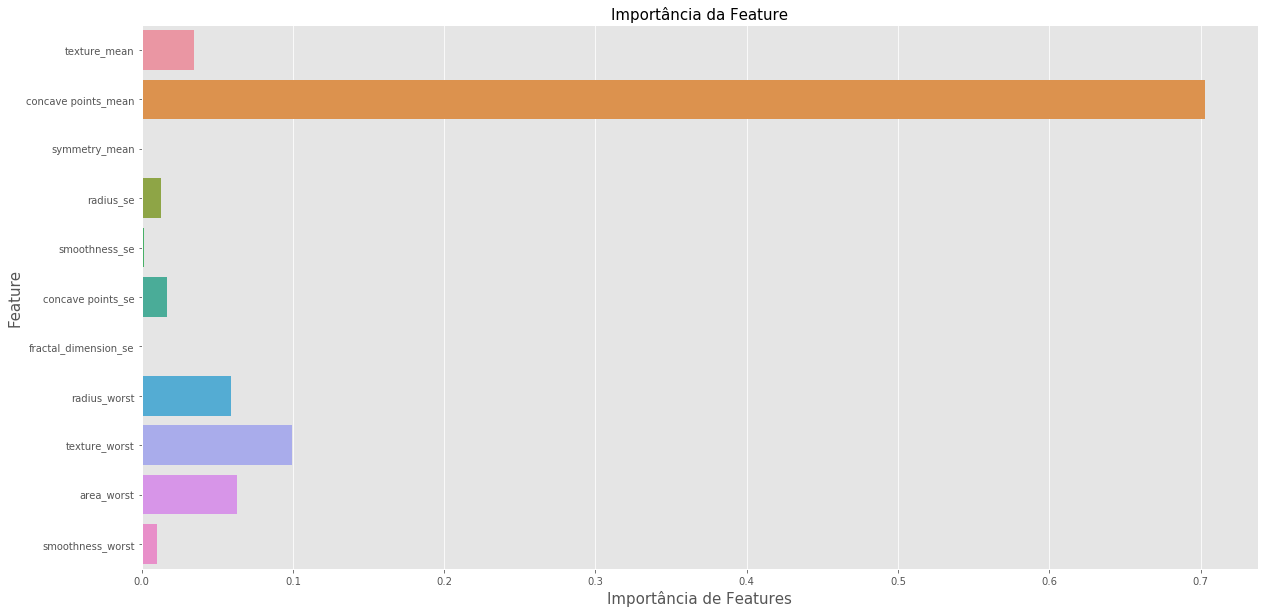

In [102]:
%matplotlib inline
plt.figure(figsize=(20,10))
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Importância de Features',size=15)
plt.ylabel('Feature',size=15)
plt.title("Importância da Feature",size=15)
plt.show()

#### Plotando a nova Árvore de decisão

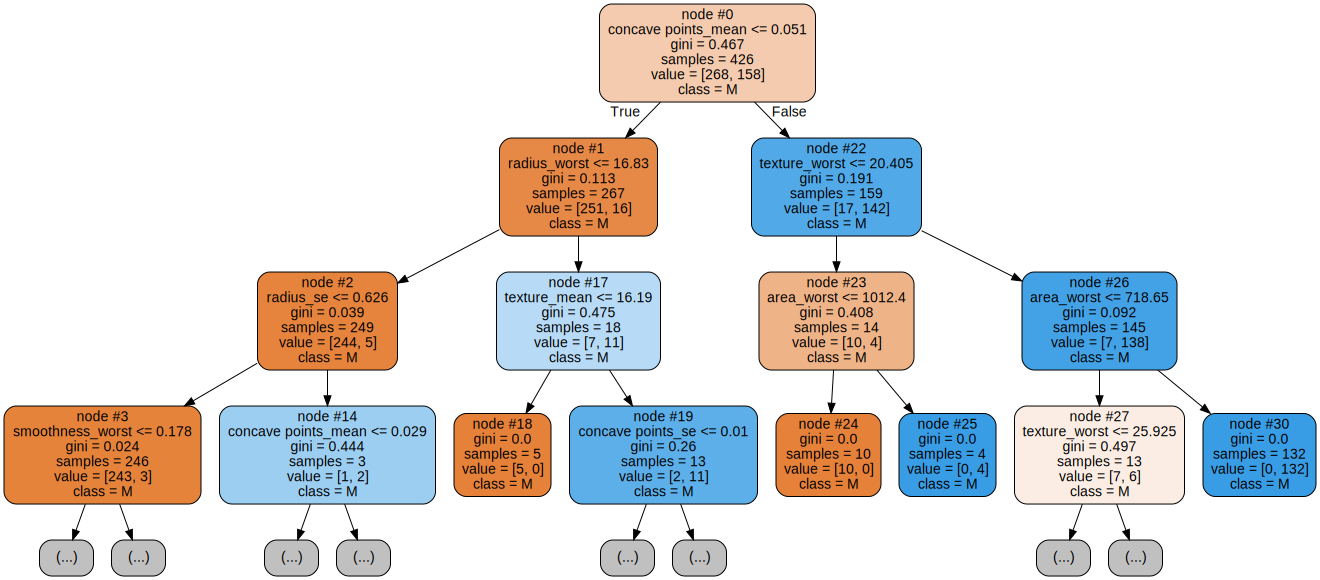

In [96]:
dot_data = tree.export_graphviz(arvore2, feature_names=X2.columns, class_names=y2, max_depth=3, filled=True, rounded=True,
                                node_ids=True, label='all')  
graph = graphviz.Source(dot_data)  
graph

## Comparação dos modelos

Podemos observar que mesmo com o aumento da acurácia do modelo (após usarmos no modelo apenas as features mais importantes do modelo anterior), houve uma melhora das **métricas de avaliação** que podemos observar na acurácia e na precisão do modelo para a classe **M**, houve um aumento de 91% para 93%.
           
           
| Classe  |  precisião M1||recall M1  || F1-score  ||  support ||precisão M2|| recall M2||f1-score M2||support||||
|---|----------------------||:-------------||----------||---------||---------||---------||---------||---------||---------||
| B |0.98||0.94 ||0.96||89||0.97||0.96||0.96||89||
| M |0.91||0.96||0.94||54||0.93||0.94||0.94||54||||
  



Também podemos ver que no novo modelo as fetures texture_mean e symmetry_mean deixaram de ser importantes para o novo modelo.


|          Feature     || Nível de importância no modelo 1              ||     Nível de importância no modelo 2     ||
|----------------------||:-------------||----------||
|texture_mean          ||     0.026011 || 0.000000 ||
|concave points_mean   ||     0.724681 || 0.724681 ||
|symmetry_mean         ||     0.006707 || 0.000000 ||
|radius_se             ||     0.012772 || 0.012772 ||
|smoothness_se         ||     0.001555 || 0.001555 ||
|concave points_se     ||     0.017025 || 0.017025 ||
|fractal_dimension_se  ||     0.008384 || 0.006707 ||
|radius_worst          ||     0.058993 || 0.067376 ||
|texture_worst         ||     0.099496 || 0.125507 ||
|area_worst            ||     0.034520 || 0.034520 ||
|smoothness_worst      ||     0.009857 || 0.009857 || 

### Curva *ROC* dos modelos

Abaixo podemos ver a curva *ROC* de cada um dos modelos do tipo árvore. 

O primeiro modelo teve um valore da *área abaixo da curva (AUC)* maior que o segundo modelo, porém a diferença é muito pequena.

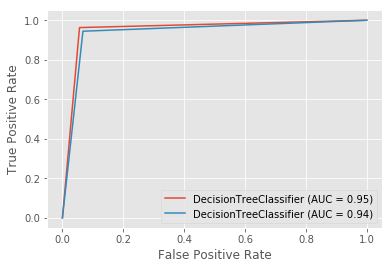

In [117]:
disp=plot_roc_curve(arvore,X_teste,y_teste)
plot_roc_curve(arvore2,X2_teste,y2_teste, ax=disp.ax_);